In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


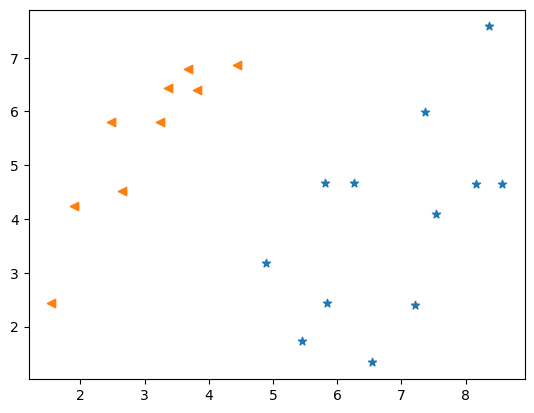

In [5]:
plt.scatter(df[df['label'] == 0]['x1'], df[df['label'] == 0]['x2'], marker='*')
plt.scatter(df[df['label'] == 1]['x1'], df[df['label'] == 1]['x2'], marker='<')

In [6]:
x_input = df[['x1','x2']].values
y_label = df[['label']].values

In [7]:
x = tf.Variable(x_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

In [8]:
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

#optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate)


In [11]:
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.sigmoid(z)
    return output
# Define a training step
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = perceptron(x)
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))

    gradients = tape.gradient(loss, [weight, bias])
    optimizer.apply_gradients(zip(gradients, [weight, bias]))

# Train the perceptron
def train(epochs, x, y):
    for epoch in range(epochs):
        train_step(x, y)
        # Optionally print the loss
        if epoch % 100 == 0:
            logits = perceptron(x)
            loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')

#Train the perceptron
train(1000, x, y)


Epoch 0, Loss: 0.5797960162162781
Epoch 100, Loss: 0.5761826038360596
Epoch 200, Loss: 0.5730921030044556
Epoch 300, Loss: 0.5704188346862793
Epoch 400, Loss: 0.5680835247039795
Epoch 500, Loss: 0.5660253167152405
Epoch 600, Loss: 0.5641971826553345
Epoch 700, Loss: 0.562562108039856
Epoch 800, Loss: 0.5610905885696411
Epoch 900, Loss: 0.5597589015960693


In [12]:
tf.print(weight, bias)

[[-1.17482316]
 [0.979796946]] [0.113777585]


In [13]:
ypred = perceptron(x)

In [14]:
ypred = tf.round(ypred)

In [15]:
acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


In [16]:
cnf_matrix = confusion_matrix(y.numpy(), ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]
